Ce travail a été réalisé à l'aide des cours de DATA ENGENIERIE, proposés par la BLENT.AI, lors de la session de novembre 2019 à février 2021. 
Les conclusions et les résultats proposés n'engagent que son auteur. 


Chaque fois qu'un utilisateur commande un taxi sur une plateforme de mise en relation (par exemple UBER) l'application doit immédiatement calculer le temps de la course, sa durée probable mais surtout proposer un prix cohérent et réaliste, puisque le paiement s'effectue généralement avant même l'exécution de la prestation de service. 
Nous sommes, en effet, loin aujourd'hui, de la négociation de gré à gré dans un marché finalement encadré, si ce n'est par le secteur publique mais bien par le secteur privé (les plateformes  de mise en relation fixent les prix).

Au delà des difficultés de disponibilité de serveurs, liés à la multitude de calculs nécessaires à l'obtention de milliers de résultats en quelques secondes, les questions  liées à la construction d'un l'algorithme se

     OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
235       236    0.044252    0.000103         Upper East Side North   
160       161    0.035804    0.000072                Midtown Center   
161       162    0.035270    0.000048                  Midtown East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((-73.96613 40.76218, -73.96658 40.761...   
235         236  Manhattan  POLYGON ((-73.95779 40.77360, -73.95826 40.772...   
160         161  Manhattan  POLYGON ((-73.97534 40.75530, -73.97581 40.754...   
161         162  Manhattan  POLYGON ((-73.97122 40.75519, -73.97168 40.754...   
185         186  Manhattan  POLYGON ((-73.99097 40.74542, -73.99142 40.744...   

       count  
236  10670.0  
235  10549.0  
160   8450.0  
161   7531.0  
185   7426.

        PULocationID  DOLocationID  fare_amount               time  \
0                246            66         25.0 -49 days +01:54:52   
1                137            89         30.5    0 days 00:18:30   
2                140           138         26.5    0 days 00:21:21   
6                138           163         45.0    0 days 00:59:16   
11                88           230         23.5    0 days 00:32:18   
...              ...           ...          ...                ...   
204832           100            88         20.5    0 days 00:21:14   
204833            75           143         20.5    0 days 00:32:00   
204839           141            87         20.5    0 days 00:16:31   
204841            74           138         20.5    0 days 00:17:18   
204842            87           161         20.5    0 days 00:23:03   

       tpep_pickup_datetime  
0       2018-02-11 15:15:01  
1       2018-01-10 00:52:59  
2       2018-01-10 07:53:05  
6       2018-01-10 16:59:33  
11      2

        PULocationID  DOLocationID tpep_pickup_datetime            time
149              138           230  2018-01-10 12:29:49 0 days 00:41:33
198              138           230  2018-01-10 12:32:25 0 days 00:39:06
269              138           230  2018-01-10 10:57:46 0 days 00:48:08
17776            138           230  2018-01-10 12:44:30 0 days 00:34:04
17984            138           230  2018-01-10 10:51:10 0 days 00:51:14
...              ...           ...                  ...             ...
187630           138           230  2018-01-10 10:26:09 0 days 00:43:52
196055           138           230  2018-01-10 10:29:03 0 days 00:52:03
196098           138           230  2018-01-10 12:52:57 0 days 00:29:08
196187           138           230  2018-01-10 12:16:50 0 days 00:44:07
196194           138           230  2018-01-10 10:18:26 0 days 00:53:47

[123 rows x 4 columns]
Temps de trajet moyen pour relier La Guardia à Time Square :
0 days 00:49:09.951219512
Distance moyenne parcouru

        PULocationID  DOLocationID tpep_pickup_datetime            time  \
3                100           226  2018-01-10 13:42:54 0 days 01:08:09   
4                138           236  2018-01-10 14:48:25 0 days 00:24:57   
5                 13             1  2018-01-10 14:23:35 0 days 00:28:18   
6                138           163  2018-01-10 16:59:33 0 days 00:59:16   
7                 43           107  2018-01-10 17:21:01 0 days 00:45:15   
...              ...           ...                  ...             ...   
204833            75           143  2018-01-10 16:50:22 0 days 00:32:00   
204835           140            48  2018-01-10 11:22:56 0 days 00:31:15   
204840           231           170  2018-01-10 11:26:47 0 days 00:24:53   
204841            74           138  2018-01-10 14:41:41 0 days 00:17:18   
204842            87           161  2018-01-10 17:51:10 0 days 00:23:03   

        trip_distance  fare_amount  
3                5.85         41.5  
4                8.69    

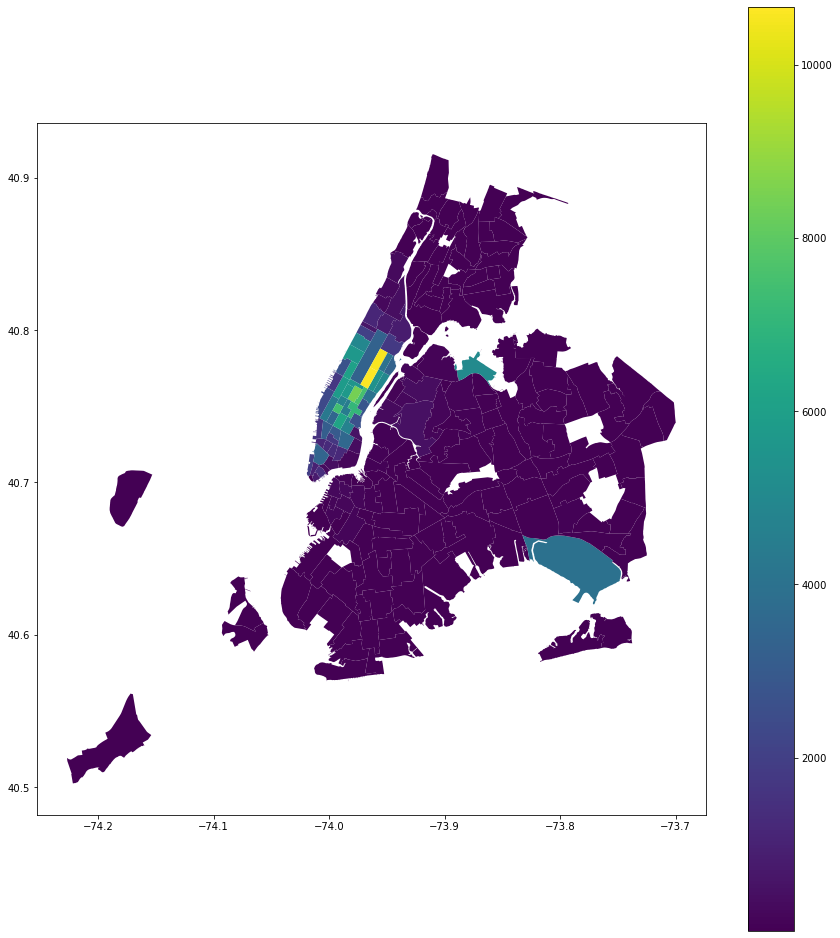

In [1]:
# import numpy as np
import pandas as panda
import sys
import os
from IPython.core.display import display, HTML
import numpy as np
import pandas as panda
import geopandas
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import datetime, date, time
#import timedelta
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



display(HTML("<h3>Comment calculer le prix d'une course d'un chauffeur de taxi 'indépendant' New-Yorkais ?</h3><br><h4>Travaux dirigés par Maxime Jumelle, BLENT AI.</h4>"))



f = open("C:/uber/Architecture.txt", "r")
print(f.read())

#display(HTML("<h3>Inspection des données avant mise en place du modèle.</h3><br>"))

#display(HTML("<h4>Lecture du fichier Trajets avec la méthode .read_csv('chemin_du_fichier_de_destination')</h4><br>"))
#display(HTML("<p>Présentation de la structure d'un fichier avec la methode head()</p><br>"))


data = panda.read_csv("C:/uber/journee_taxi.csv")
#print(data.head())

#display(HTML("<h4>Quelques indications avec la méthode groupby de Panda"))
display(HTML("<h3>Habitudes des consommateurs par zones</h3>"))
display(HTML("<p>Il a été nécessaire pour y parvenir d'utiliser la méthode Merge avec Python, Panda et Geopandas. "))
display(HTML("<p>Nous avons fusionné la carte et les distances. "))
data['count']=1
#display(HTML("<p>Présentation du fichier avec zone de Pickup, zone de Drop Off, prix, horaire de pickup</p>"))
#print(data.loc[(data['PULocationID']>0) & (data['DOLocationID']>0), ['PULocationID','DOLocationID','fare_amount','tpep_pickup_datetime']])


display(HTML("<p>Les zones de Manhattan, principales zones de Pickup en ordre décroissant sur la journée du 10.01.2018 9h00 - 19h00"))
resultats_habitudes = data[['PULocationID','count']]
#resultats_habitudes[(resultats_habitudes['PULocationID','DOLocationID','fare_amount','tpep_pickup_datetime'])]
resultats_habitudes[(resultats_habitudes['PULocationID']>0)]
#print(resultats_habitudes.groupby(by='PULocationID').sum())
resultats2 = resultats_habitudes.groupby(by='PULocationID').sum()
#print(resultats2.sort_values(by=['count'],ascending=False))

#display(HTML("<p>Il convient d'identifier les zones dans l'espace. Pour cela nous mergeons les deux fichiers sur la colonne ayant un sens commun"))
#display(HTML("<p>La structure du fichier indique location ID comme colonne commune entre les deux fichiers qui correspond à la zone de pick-up"))
zones = geopandas.read_file(
    os.path.expanduser("C:/uber/taxi_zones.shp")
)
zones_gps = zones.to_crs("EPSG:4326")
#print(zones_gps.head())
#print(resultats_habitudes.sort_values(by=['PULocationID']))

data_zones = zones_gps.merge(resultats2.astype(int), how ='left', left_on='LocationID', right_on='PULocationID')
#data_zones_simp =data_zones[['LocationID','zone','count']]
#print(data_zones.head())
print(data_zones.sort_values(by=['count'],ascending=False).head())

#representation=data_zones_simp.sort_values(by=['count'],ascending=False)
data_zones =GeoDataFrame(data_zones)
data_zones.plot(column='count',legend=True, figsize=(15,17))



#display(HTML("<h4>Exploitation du modèle en Data Streaming.</h4><br>"))


display(HTML("<h3>Détermination des distances et temps entre chaque zone sur une amplitude de 10 heures - ajout de la colonne Time - </h3>"))

data = panda.read_csv("C:/uber/journee_taxi.csv")
#data['duree']=0
data['tpep_dropoff_datetime']=panda.to_datetime(data['tpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S")
data['tpep_dropoff_datetime']=data['tpep_dropoff_datetime']
data['tpep_pickup_datetime']=panda.to_datetime(data['tpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")
#data['duree']=panda.to_datetime(data['duree'],format="%Y-%m-%d %H:%M:%S")
#print(data.head())
def dureefct(A,B):
     return(A-B)
data['time']=dureefct(data['tpep_dropoff_datetime'], data['tpep_pickup_datetime'])

print (data.loc[(data['VendorID']==1), ['PULocationID','DOLocationID','fare_amount','time','tpep_pickup_datetime']])

#print("nous travaillons sur une base de 10 000 trajets sur une amplitude horaire de 9 heures")
#print ('nombre de chauffeurs: à définir')
print (data['trip_distance'].sum())
somme_distance=data['trip_distance'].sum()
print (data['time'].sum())


#(nb_chauffeurs/somme_distance)+facteurx=140*1.5
#nb_chauffeurs= somme_distance/140*1.5

#display(HTML('<h3> Choix de la problématique à partir du projet : </h3>'))
display(HTML("<h4> 1. Exemple d'un trajet ici celui reliant la Guardia-Zones 138 à Times Square-Zone 230 à l'aide de la méthode .loc : </h4>"))
#display(HTML('<h4> 2. Identification de l"heure de pickup avec +3 heures d"écart pour le calcul du temps de trajet: </h4>'))
print (data.loc[(data['PULocationID'] == 138) & (data['DOLocationID'] == 230) & (data['tpep_pickup_datetime'] >= "2018-01-10 09:53:10") & (data['tpep_pickup_datetime'] <= "2018-01-10 12:53:10"),['PULocationID', 'DOLocationID','tpep_pickup_datetime', 'time', ]])
tempsdetrajet = data.loc[(data['PULocationID'] == 138) & (data['DOLocationID'] == 230) & (data['tpep_pickup_datetime'] >= "2018-01-10 09:53:10") & (data['tpep_pickup_datetime'] <= "2018-01-10 12:53:10"),['PULocationID', 'DOLocationID','tpep_pickup_datetime','trip_distance', 'time','fare_amount']]
#print ("Paramètres du modèle : Zones de pickup, Zone de Drop Off, horaire de Pickup comparé aux horaires H+3 de Pickup")
#print ("Le temps de trajets moyen pour relier la Guardia à Time Square entre l'heure de pickup et l'heure de pickup + 3 est de :")
print("Temps de trajet moyen pour relier La Guardia à Time Square :")
print(tempsdetrajet['time'].mean())
print("Distance moyenne parcourue :")
print(tempsdetrajet['trip_distance'].mean())
print("Prix moyen payé en 2018 :")
print(tempsdetrajet['fare_amount'].mean())
print("le prix est d'envrion 4 euros par kilomètres pour cette distance sur cette heure de pickup (+/-3 heures)")

display(HTML("<h4> Application du modèle sur l'ensemble de NYC et une amplitude de 10 heures </h4>"))
print (data.loc[(data['PULocationID'] > 0) & (data['DOLocationID'] > 0) & (data['tpep_pickup_datetime'] >= "2018-01-10 09:00:00") & (data['tpep_pickup_datetime'] <= "2018-01-10 19:00:00"),['PULocationID', 'DOLocationID','tpep_pickup_datetime', 'time','trip_distance','fare_amount' ]])
basemodele =data.loc[(data['PULocationID'] > 0) & (data['DOLocationID'] > 0) & (data['tpep_pickup_datetime'] >= "2018-01-10 09:00:00") & (data['tpep_pickup_datetime'] <= "2018-01-10 19:00:00"),['PULocationID', 'DOLocationID','tpep_pickup_datetime', 'time','trip_distance','fare_amount' ]]
print("Total de kilomètres à parcourir sur NYC entre 9 heures et 19 heures selon trajets historiques :")
print(basemodele['trip_distance'].sum())
#print("nombre de chauffeurs sur une amplitude de 9 heures à 18 heures, estimée à 8000 ")
#print ("rémunération souhaitée : 160$ coefficient prenant en compte la borne basse compris")
#print("x la variable permetttant de corriger le prix au km de sorte qu'en fonction du nombre de chauffeur et de la distance, le revenu soit de 160$")

SOMMEDISTANCEJOUR = basemodele['trip_distance'].sum()
NBCHAUFFEURS = 8000
X=0
PRIXKM=3.70
PRIXJOURNEE=180
A=SOMMEDISTANCEJOUR * PRIXKM
B=NBCHAUFFEURS * PRIXJOURNEE


PRIXKM = (NBCHAUFFEURS*PRIXJOURNEE)/SOMMEDISTANCEJOUR
print("Prix au km par application du modèle :")
print (PRIXKM)

print("Selon les données publiées, prix au kilomètres et coût de la prise en charge compris, le tarif proposé est compris en moyenne entre 3 et 4 euros")
print("Ce tarif est cohérant, sur la base de 8000 chauffeurs opérant simultanément pour une distance totale d'environ 40 000 kilomètres")

    





      